In [333]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import matplotlib.pyplot as plt
import numpy as np

In [334]:
factory = PokemonFactory("pokemon.json")

In [335]:
jolteon = factory.create("jolteon", 100, StatusEffect.NONE, 1)
caterpie = factory.create("caterpie", 100, StatusEffect.NONE, 1)
snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
onix = factory.create("onix", 100, StatusEffect.NONE, 1)
mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, 1)

In [336]:
# successJoletonPokeball = 0
# successCaterpiePokeball = 0
# successSnorlaxPokeball = 0
# successOnixPokeball = 0
# successMewtwoPokeball = 0
# 
# successJoletonUltraball = 0
# successCaterpieUltraball = 0
# successSnorlaxUltraball = 0
# successOnixUltraball = 0
# successMewtwoUltraball = 0
# 
# successJoletonFastBall = 0
# successCaterpieFastBall = 0
# successSnorlaxFastBall = 0
# successOnixFastBall = 0
# successMewtwoFastBall = 0
# 
# successJoletonHeavyBall = 0
# successCaterieHeavyBall = 0
# successSnorlaxHeavyBall = 0
# successOnixHeavyBall = 0
# successMewtwoHeavyBall = 0

successPokeBall = [0, 0, 0, 0, 0]
successUltraBall = [0, 0, 0, 0, 0]
successFastBall = [0, 0, 0, 0, 0]
successHeavyBall = [0, 0, 0, 0, 0]

In [337]:
for _ in range(100):
    for index, pokemon in enumerate([jolteon, caterpie, snorlax, onix, mewtwo]):
        if attempt_catch(pokemon, "pokeball")[0]:
            successPokeBall[index]+=1
        if attempt_catch(pokemon, "ultraball")[0]:
            successUltraBall[index]+=1
        if attempt_catch(pokemon, "fastball")[0]:
            successFastBall[index]+=1
        if attempt_catch(pokemon, "heavyball")[0]:
            successHeavyBall[index]+=1




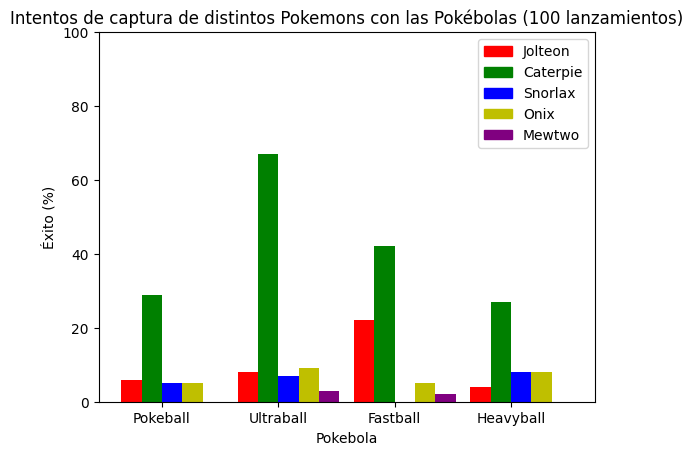

In [338]:
data = [successPokeBall, successUltraBall, successFastBall, successHeavyBall]

fig, ax = plt.subplots()
bar_width = 0.175
bar_positions = np.arange(len(data))

max_length = max(len(sublist) for sublist in data)

for i, (label, color) in enumerate(zip(["Jolteon", "Caterpie", "Snorlax", "Onix", "Mewtwo"], ['r', 'g', 'b', 'y', 'purple'])):
    success_data = [sublist[i] if i < len(sublist) else 0 for sublist in data]
    ax.bar(
        bar_positions + i * bar_width,
        success_data,
        width=bar_width,
        label=label,
        color=color
    )

# Configurar el gráfico
ax.set_xlabel("Pokebola")
ax.set_ylabel("Éxito (%)")
ax.set_title("Intentos de captura de distintos Pokemons con las Pokébolas (100 lanzamientos)")
ax.set_xticks([pos + bar_width * 1.5 for pos in bar_positions])
ax.set_xticklabels(["Pokeball", "Ultraball", "Fastball", "Heavyball"])

# Crear leyendas fuera del bucle para evitar repeticiones
labels = ["Jolteon", "Caterpie", "Snorlax", "Onix", "Mewtwo"]
handles = [plt.Rectangle((0,0),1,1, color='r'), plt.Rectangle((0,0),1,1, color='g'), plt.Rectangle((0,0),1,1, color='b'), plt.Rectangle((0,0),1,1, color='y'), plt.Rectangle((0,0),1,1, color='purple')]
ax.legend(handles, labels)

# Mostrar el gráfico
plt.ylim(0, 100)
plt.show()